In [96]:
import pandas as pd
from pandas import get_dummies
from pathlib import Path
from path import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.datasets import make_blobs
import sklearn as skl

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [97]:
# #Load CSV file as a Pandas DataFrame

# df = pd.read_csv(Path('./Resources/vgsales.csv'))
# df.head()

file_path = 'Resources/vgsales.csv'
df = pd.read_csv(file_path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [98]:
# What type of data is available? List DF data types
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [99]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")
    
    

Column Rank has 0 null values
Column Name has 0 null values
Column Platform has 0 null values
Column Year has 271 null values
Column Genre has 0 null values
Column Publisher has 58 null values
Column NA_Sales has 0 null values
Column EU_Sales has 0 null values
Column JP_Sales has 0 null values
Column Other_Sales has 0 null values
Column Global_Sales has 0 null values


In [100]:
# Drop null rows
df.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [101]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [102]:
df = df.drop(['Rank', 'Year', 'Publisher', 'Global_Sales'], axis=1)
df.head()

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00


In [103]:
df.columns

Index(['Name', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales'],
      dtype='object')

# Neural Network Model

In [104]:
# # Read the data
# vg_df = pd.read_csv('Resources/vgsales.csv')

# Print out the Genre value counts
genre_counts = df.Genre.value_counts()
genre_counts

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

<AxesSubplot:ylabel='Density'>

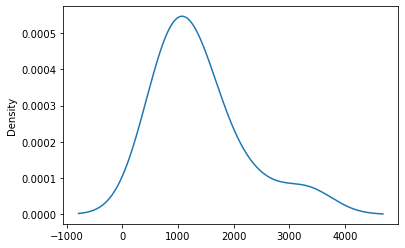

In [105]:
# Visualize the value counts
genre_counts.plot.density()

In [106]:
# Determine which values to replace
replace_genre = list(genre_counts[genre_counts < 1000].index)

# Replace in DataFrame
for genre in replace_genre:
    df.Genre = df.Genre.replace(genre,"Other")


# Check to make sure binning was successful
df.Genre.value_counts()

Other           3864
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Name: Genre, dtype: int64

In [107]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df.Genre.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Genre'])
encode_df.head()

,Genre_Action,Genre_Adventure,Genre_Misc,Genre_Other,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Sports
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
# Merge the two DataFrames together and drop the Genre column
vg_merged = df.merge(encode_df,left_index=True,right_index=True).drop('Genre',1)
vg_merged

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Misc,Genre_Other,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Sports
0,Wii Sports,Wii,41.49,29.02,3.77,8.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Super Mario Bros.,NES,29.08,3.58,6.81,0.77,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,Wii,15.85,12.88,3.79,3.31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Wii Sports Resort,Wii,15.75,11.01,3.28,2.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Pokemon Red/Pokemon Blue,GB,11.27,8.89,10.22,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,0.01,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16594,Men in Black II: Alien Escape,GC,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16595,SCORE International Baja 1000: The Official Game,PS2,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16596,Know How 2,DS,0.00,0.01,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
# Print out the Platform value counts
platform_counts = vg_merged.Platform.value_counts()
platform_counts

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

<AxesSubplot:ylabel='Density'>

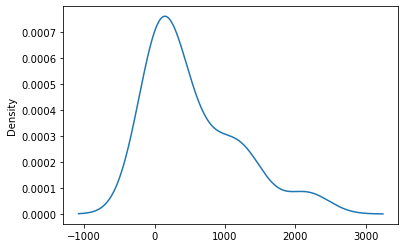

In [89]:
# Visualize the value counts
platform_counts.plot.density()

In [110]:
# Determine which values to replace
replace_platform = list(platform_counts[platform_counts < 500].index)

# Replace in DataFrame
for platform in replace_platform:
    vg_merged.Platform = vg_merged.Platform.replace(platform,"Other")


# Check to make sure binning was successful
vg_merged.Platform.value_counts()

Other    2275
DS       2163
PS2      2161
PS3      1329
Wii      1325
X360     1265
PSP      1213
PS       1196
PC        960
XB        824
GBA       822
GC        556
3DS       509
Name: Platform, dtype: int64

In [111]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df1 = pd.DataFrame(enc.fit_transform(vg_merged.Platform.values.reshape(-1,1)))

# Rename encoded columns
encode_df1.columns = enc.get_feature_names(['Platform'])
encode_df1.head()

,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_Other,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PSP,Platform_Wii,Platform_X360,Platform_XB
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Merge the two DataFrames together and drop the Platform column
vg_merged2 = vg_merged.merge(encode_df1,left_index=True,right_index=True).drop('Platform', 1)
vg_merged2

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Misc,Genre_Other,Genre_Racing,...,Platform_GC,Platform_Other,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PSP,Platform_Wii,Platform_X360,Platform_XB
0,Wii Sports,41.49,29.02,3.77,8.46,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Super Mario Bros.,29.08,3.58,6.81,0.77,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,15.85,12.88,3.79,3.31,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Wii Sports Resort,15.75,11.01,3.28,2.96,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16594,Men in Black II: Alien Escape,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,SCORE International Baja 1000: The Official Game,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16596,Know How 2,0.00,0.01,0.00,0.00,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# Loading file to CSV
output_file_path = 'Resources/vg_merged2.csv'
vg_merged2.to_csv(output_file_path, index=False)

In [114]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [115]:
# Fit the StandardScaler
scaler.fit(vg_merged2)

ValueError: could not convert string to float: 'Wii Sports'